# Grover's Algorithm: Quantum Search Made Simple 🔍
07.06.25

## 1. What Problem Does Grover's Algorithm Solve? 🎯

### The Universal Search Problem
Imagine you have a huge, unsorted database and need to find a specific item. This happens everywhere:
- **Database queries**: Finding a record in millions of entries
- **Password cracking**: Testing possible combinations
- **Optimization**: Finding the best solution among many options
- **Pattern matching**: Locating specific data in large datasets

### The Classical Approach: Brute Force 😴
**Traditional computer method:**
- Check each item one by one
- **Time complexity**: O(N) - potentially need to check every single item
- **For 1 million items**: Might need up to 500,000 checks on average
- **Problem**: Gets slower as database grows linearly

### The Quantum Solution: [Grover's Algorithm](https://quantum.cloud.ibm.com/docs/en/tutorials/grovers-algorithm) ⚡
**Quantum computer method:**
- Uses quantum superposition and interference
- **Time complexity**: O(√N) - quadratic speedup!
- **For 1 million items**: Only need about 1,000 operations
- **Advantage**: Gets exponentially better as database grows

### Real-World Impact 🌍 Practical Examples:
- **Cryptography**: Breaking encryption keys faster
- **Drug discovery**: Searching molecular combinations
- **Finance**: Finding optimal trading strategies
- **AI/ML**: Speeding up optimization algorithms
- **Logistics**: Route optimization problems

### The Speedup in Numbers:
| Database Size | Classical Operations | Grover Operations | Speedup Factor |
|---------------|---------------------|-------------------|----------------|
| 100 items     | ~50                 | ~8                | 6x faster      |
| 10,000 items  | ~5,000              | ~79               | 63x faster     |
| 1 million     | ~500,000            | ~1,000            | 500x faster    |
| 1 billion     | ~500 million        | ~31,623           | 15,811x faster |

### What We'll Learn in This Notebook 📚
1. **Oracle Function**: How to "mark" target items in quantum superposition
2. **Complete Algorithm**: Step-by-step construction of the search process  
3. **Practical Implementation**: Running on real quantum simulators
4. **Visual Results**: See the quantum speedup in action

**Key Insight**: We're not just making computers faster. We are using the fundamental properties of quantum mechanics (superposition and interference) to solve problems in a fundamentally different way.

Let's dive in! 🚀


## 🛠️ 2. Quantum Computer Initialisation 

In [1]:
# Setup and Initialization
print("🛠️ Setting up Grover's Algorithm Implementation")
print("=" * 60)

# Introduction
print("\n📦 What We Need to Get Started:")
print("1. Quantum Circuit Construction: Tools to build quantum circuits (Qiskit)")
print("2. Mathematical Functions: For calculating optimal iterations (math)")
print("3. Visualization: To see our results clearly (matplotlib)")
print("4. Quantum Simulators: To run our quantum circuits")

print("\n🎯 Two Ways to Run This Notebook:")
print("- 🖥️  Local Simulator: Always available, fast, perfect for learning")
print("- ☁️  IBM Quantum: Real quantum hardware (optional, requires free account)")

print(f"\n⚙️ Loading required libraries...")

# Standard Libraries
import os
import math
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Qiskit Core
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import grover_operator, MCMTGate, MCXGate, ZGate
from qiskit.visualization import plot_distribution

# Local Simulator
from qiskit_aer import AerSimulator
simulator = AerSimulator()

# Runtime Setup
USE_IBM_QUANTUM = True  # 👈 Toggle this to switch between local simulator and IBM hardware
IBM_RUNTIME_AVAILABLE = False
backend = simulator  # Default to local

# Try importing IBM Runtime
try:
    from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
    IBM_RUNTIME_AVAILABLE = False
    print("✅ IBM Quantum Runtime available")
except ImportError:
    print("⚠️ IBM Quantum Runtime not available - using local simulator")

# If IBM Quantum is selected and available
if USE_IBM_QUANTUM and IBM_RUNTIME_AVAILABLE:
    print(f"\n🔐 Attempting IBM Quantum Setup...")

    # Load API key
    load_dotenv("local.env")
    IBM_QUANTUM_API_KEY = os.getenv("IBM_QUANTUM_API_KEY")

    if IBM_QUANTUM_API_KEY:
        try:
            QiskitRuntimeService.save_account(token=IBM_QUANTUM_API_KEY, overwrite=True)
            service = QiskitRuntimeService(instance="diorama")  # Replace with your specific instance
            backend = service.backends()[0]  # Pick the first backend (or choose by name)
            print(f"✅ Connected to IBM Quantum! Using backend: {backend.name}")
        except Exception as e:
            print(f"❌ IBM Quantum setup failed: {e}")
            print("✅ Falling back to local simulator.")
            backend = simulator
    else:
        print("❌ API key missing or placeholder detected - using local simulator")
else:
    print("💡 Using local simulator - fast, always available")

print(f"\n🎉 Setup complete! Backend in use: {backend.name}")

🛠️ Setting up Grover's Algorithm Implementation

📦 What We Need to Get Started:
1. Quantum Circuit Construction: Tools to build quantum circuits (Qiskit)
2. Mathematical Functions: For calculating optimal iterations (math)
3. Visualization: To see our results clearly (matplotlib)
4. Quantum Simulators: To run our quantum circuits

🎯 Two Ways to Run This Notebook:
- 🖥️  Local Simulator: Always available, fast, perfect for learning
- ☁️  IBM Quantum: Real quantum hardware (optional, requires free account)

⚙️ Loading required libraries...
✅ IBM Quantum Runtime available
💡 Using local simulator - fast, always available

🎉 Setup complete! Backend in use: aer_simulator


## 🔧 3. Building the Oracle in Grover's Algorithm

### 🧠 The Big Idea
Imagine searching for a specific book in a giant, unorganized library. Normally, you'd check each book one at a time — slow and tedious.

Grover's algorithm helps you search much faster — like having a magical helper. But this helper needs to know **what you're looking for** — and that's the job of the **Oracle**.

### 🎯 What Does the Oracle Do?
The Oracle is a special quantum operation that can:
- Recognize the correct answer (your target) when it sees it
- Secretly "tag" it using quantum mechanics, without telling you where it is
- Prepare the system so that Grover’s algorithm can increase the chance of finding it

Think of it like a **secret marker** that highlights the right answer in a way only the quantum algorithm can understand.

### 🌀 How It Works (Intuition)
1. You describe what you’re searching for (a specific bit pattern)
2. The Oracle applies a **phase flip** — a kind of invisible "bookmark" on that state
3. This phase flip doesn’t directly reveal the answer but sets it apart
4. Grover’s algorithm then uses this mark to **amplify** the probability of measuring the correct result

### 🌊 Why This Matters
Quantum systems behave like waves. By flipping the phase of just the target state:
- The algorithm makes the waves **interfere** so the target becomes more likely
- Wrong answers cancel each other out
- The right answer stands out

### 🧪 What the Code Does
The `grover_oracle` function:
- Identifies the target state(s)
- Builds logic gates to detect it
- Applies a **phase flip** (negative sign) to mark it

This "marking" is how Grover’s algorithm knows which answers to amplify — a key step in making quantum search powerful.


The `build_grover_oracle` function builds a Grover oracle — a quantum circuit that "marks" one or more target bit-strings by flipping their phase. It takes a list of binary strings (e.g., "011", "001") representing the desired target states, and creates a quantum circuit that applies a phase flip (via multi-controlled-Z logic) to those states. This marking allows Grover's algorithm to later amplify their probability during measurement.
It automatically handles:
* Arbitrary numbers of qubits
* Multiple marked states
* Qiskit's bit-order conventions

In [2]:
def build_grover_oracle(marked_states):
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    
    if not marked_states:
        raise ValueError("At least one marked state must be provided")
    
    num_qubits = len(marked_states[0])
    qc = QuantumCircuit(num_qubits, name="Oracle")

    for target in marked_states:
        rev_target = target[::-1]

        for i, bit in enumerate(rev_target):
            if bit == '0':
                qc.x(i)

        # Apply controlled-Z via H + MCX + H trick
        if num_qubits == 1:
            qc.z(0)
        elif num_qubits == 2:
            qc.cz(0, 1)
        else:
            # H-Z-H = X for phase flip
            qc.h(num_qubits - 1)
            mcx = MCXGate(num_ctrl_qubits=num_qubits - 1)
            qc.append(mcx, list(range(num_qubits)))
            qc.h(num_qubits - 1)

        for i, bit in enumerate(rev_target):
            if bit == '0':
                qc.x(i)

    return qc


# Test the oracle
print("🧪 Building Grover Oracle:")
oracle_11 = build_grover_oracle(["011","001"])
print(f"✅ Oracle for target '11' created successfully")
print(f"   Circuit depth: {oracle_11.depth()}")
print(f"   Number of gates: {oracle_11.size()}")

🧪 Building Grover Oracle:
✅ Oracle for target '11' created successfully
   Circuit depth: 10
   Number of gates: 12


## 🏗️ 4. Complete Grover Circuit – The Full Quantum Search Engine

### 🔍 What Is Grover’s Algorithm?
Grover’s algorithm is a quantum search method that finds one or more "marked" items (answers) much faster than a classical search. It works by cleverly amplifying the probability of the correct answer showing up when you measure the quantum system.

You can think of it like a **quantum-powered smart librarian** that helps you find the right book in a huge, unsorted library with surprisingly few steps.

### 📋 Three Key Steps in the Grover Circuit

#### 1️⃣ Initialization: Explore All Possibilities Equally
- All qubits are placed into a **superposition** using Hadamard (H) gates.
- This creates equal probability for every possible state (like flipping quantum coins).
- For 2 qubits, this means all 4 states (|00⟩, |01⟩, |10⟩, |11⟩) are equally likely at first.

#### 2️⃣ Grover Iterations: Searching with Quantum Interference
Each iteration has two parts:
- **Oracle**: Flips the phase of the target state(s) — this "marks" them invisibly.
- **Diffusion**: Reflects the quantum state around the average, amplifying the marked states.

With each iteration, the likelihood of measuring the correct state **increases**, while incorrect options become less likely. Think of it as sharpening the focus on the answer.

#### 3️⃣ Measurement: Reveal the Answer
- Measuring the qubits collapses the quantum state to a classical result.
- If the algorithm worked correctly, the marked state is now the most likely outcome.

### 🎯 Why Use the Optimal Number of Iterations?
Grover's algorithm has a "sweet spot" for how many times to repeat the oracle + diffusion step:
- Too few: Not enough amplification
- Too many: The probability starts decreasing again
- Optimal: About `π/4 × √(N / M)` iterations
  - `N` = total number of possible states
  - `M` = number of marked states

### 📚 Real-World Analogy: The Smart Quantum Librarian
1. **Step 1**: "Your book could be anywhere" → Superposition
2. **Step 2**: Repeatedly:
   - Secretly mark your book → Oracle
   - Make it stand out among others → Diffusion
3. **Step 3**: Take a look → Your book is now the one that "pops out" the most

Instead of flipping through every page, Grover’s algorithm tilts the odds toward the right answer and it does so **exponentially faster** than classical search.

### 🧪 Let's now build and run the complete Grover circuit with optimal iterations:

In [3]:
def create_grover_circuit(marked_states):
    """Create complete Grover algorithm circuit
    
    Parameters:
        marked_states (list): List of marked states to search for
    
    Returns:
        tuple: (QuantumCircuit, number_of_iterations)
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    
    num_qubits = len(marked_states[0])
    
    # Calculate optimal number of iterations
    N = 2**num_qubits  # Total number of states
    M = len(marked_states)  # Number of marked states
    
    # Optimal iterations: ≈ π/4 * √(N/M)
    optimal_iterations = int(math.pi / 4 * math.sqrt(N / M))
    optimal_iterations = max(1, optimal_iterations)  # At least 1 iteration
    
    print(f"🎯 Searching for: {marked_states}")
    print(f"📊 Total states: {N}, Marked states: {M}")
    print(f"🔄 Optimal iterations: {optimal_iterations}")
    
    # Create the circuit
    qc = QuantumCircuit(num_qubits, num_qubits)  # FIXED: Correct number of classical bits
    
    # Step 1: Initialize superposition
    qc.h(range(num_qubits))
    
    # Step 2: Apply Grover iterations
    oracle = build_grover_oracle(marked_states)
    diffusion = grover_operator(oracle, name='Grover')
    
    for i in range(optimal_iterations):
        qc.compose(diffusion, inplace=True)
        qc.barrier()  # Visual separator
    
    # Step 3: Measure all qubits  
    # FIXED: Use explicit measure instead of measure_all()
    qc.measure(range(num_qubits), range(num_qubits))
    
    return qc, optimal_iterations

# Create Grover circuit for target "11"
target_states = ["11"]
grover_circuit, iterations = create_grover_circuit(target_states)

print(f"\n🔍 Circuit Analysis:")
print(f"   - Qubits: {grover_circuit.num_qubits}")
print(f"   - Classical bits: {grover_circuit.num_clbits}")
print(f"   - Circuit depth: {grover_circuit.depth()}")
print(f"   - Total gates: {grover_circuit.size()}")

🎯 Searching for: ['11']
📊 Total states: 4, Marked states: 1
🔄 Optimal iterations: 1

🔍 Circuit Analysis:
   - Qubits: 2
   - Classical bits: 2
   - Circuit depth: 10
   - Total gates: 16


## 🚀 5. Running the Algorithm - Step-by-Step Progression

### 📊 Visualizing How Grover's Algorithm Builds Toward 100% Success 📈

One of the most fascinating aspects of Grover's algorithm is watching how it systematically amplifies the target state probability through each step. Let's create a visualization that shows the probability evolution at each stage of the algorithm.

We'll demonstrate this with both our 2-qubit example (which finds the answer in 1 iteration) and a 3-qubit example (which requires 2 iterations) to better see the progression.


🔍 2-Qubit Example (Fast convergence):
🎯 Analyzing Grover's Algorithm for target '11'
📊 Search space: 4 states, Target states: 1
🔄 Optimal iterations: 1
🏁 Step 1 - Initial Superposition:
   All states have equal probability: 25.0%
   Target '11' (index 3) probability: 25.0%

🔄 Iteration 1:
   📍 After Oracle: Target probability = 25.0% (phase flipped)
   ✅ After Diffusion: Target probability = 100.0%


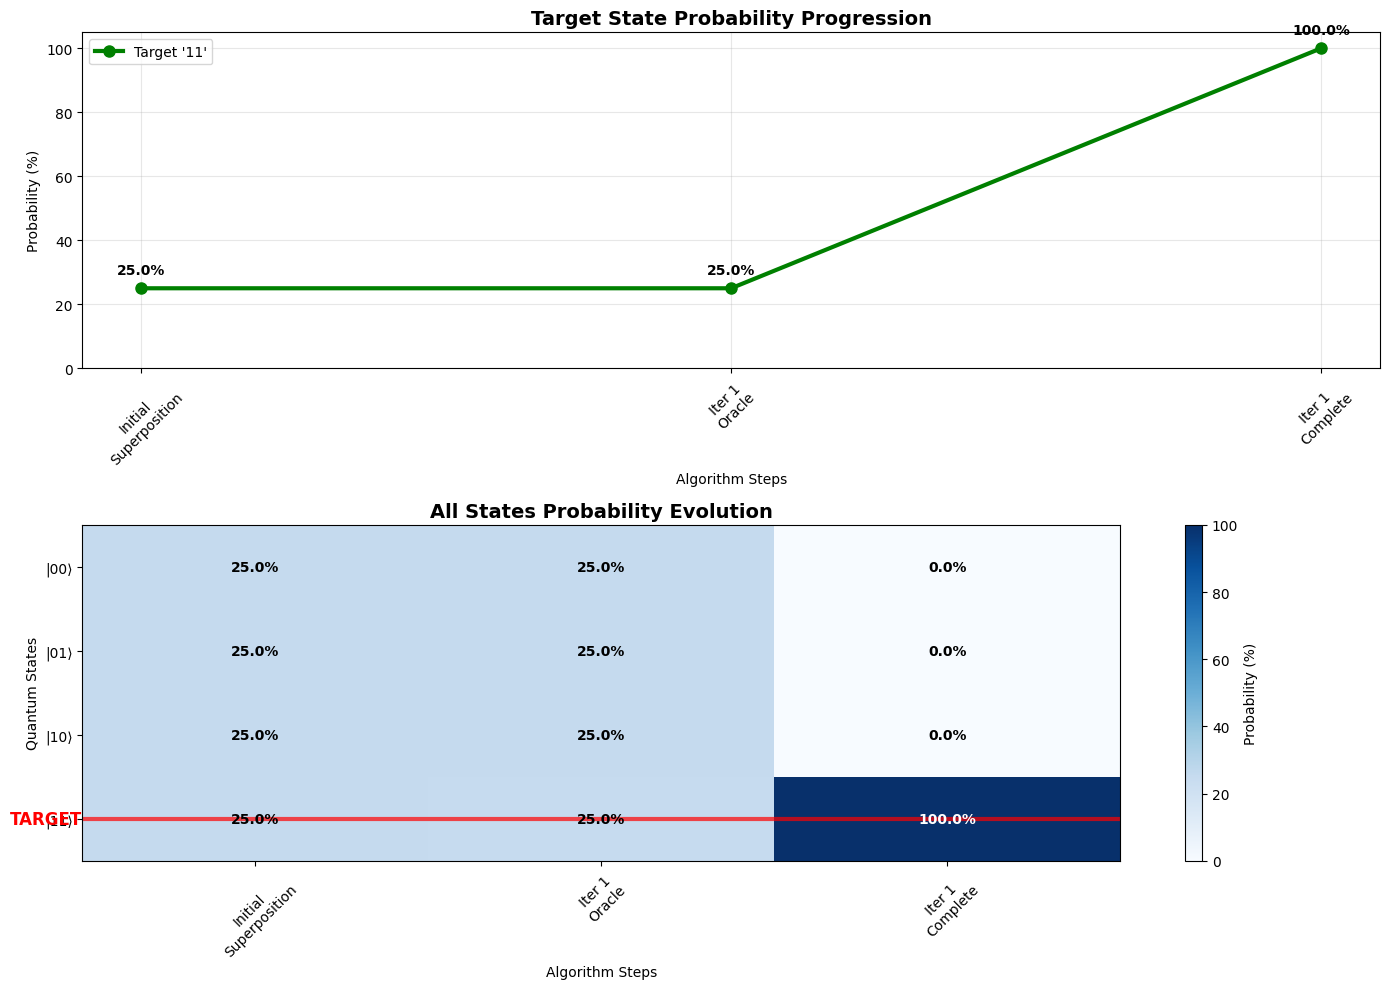


🎊 Final Results:
   Target '11' final probability: 100.0%
   Amplification factor: 4.0x (from 25.0% to 100.0%)


In [4]:
# Need numpy for array operations
import numpy as np

def visualize_grover_progression(target_state, show_detailed_steps=True):
    """
    Visualize the step-by-step progression of Grover's algorithm (bit-order corrected)
    
    Parameters:
        target_state (str): Target state as binary string (e.g., "101")
        show_detailed_steps (bool): Whether to show oracle step separately
    """
    import numpy as np
    from qiskit import QuantumCircuit
    from qiskit.circuit.library import grover_operator
    from qiskit_aer import StatevectorSimulator
    import matplotlib.pyplot as plt

    if isinstance(target_state, list):
        target_state = target_state[0]
    
    num_qubits = len(target_state)
    N = 2 ** num_qubits
    M = 1
    optimal_iterations = max(1, int(math.pi / 4 * math.sqrt(N / M)))

    print(f"🎯 Analyzing Grover's Algorithm for target '{target_state}'")
    print(f"📊 Search space: {N} states, Target states: {M}")
    print(f"🔄 Optimal iterations: {optimal_iterations}")
    print("=" * 70)

    # Fix: Reverse target bitstring to align with little-endian indexing
    reversed_target = target_state[::-1]
    target_index = int(reversed_target, 2)

    all_states = [format(i, f'0{num_qubits}b') for i in range(N)]
    progression_data = []
    step_labels = []

    initial_probs = [1 / N] * N
    progression_data.append(initial_probs.copy())
    step_labels.append("Initial\nSuperposition")

    print(f"🏁 Step 1 - Initial Superposition:")
    print(f"   All states have equal probability: {100 / N:.1f}%")
    print(f"   Target '{target_state}' (index {target_index}) probability: {initial_probs[target_index] * 100:.1f}%")

    sv_sim = StatevectorSimulator()
    qc = QuantumCircuit(num_qubits)
    qc.h(range(num_qubits))

    oracle = build_grover_oracle(target_state)

    for iteration in range(optimal_iterations):
        print(f"\n🔄 Iteration {iteration + 1}:")

        if show_detailed_steps:
            qc_oracle = qc.copy()
            qc_oracle.compose(oracle, inplace=True)
            sv_job = sv_sim.run(qc_oracle)
            statevector = np.asarray(sv_job.result().get_statevector())
            oracle_probs = [abs(amplitude)**2 for amplitude in statevector]
            progression_data.append(oracle_probs.copy())
            step_labels.append(f"Iter {iteration + 1}\nOracle")
            print(f"   📍 After Oracle: Target probability = {oracle_probs[target_index] * 100:.1f}% (phase flipped)")

        diffusion = grover_operator(oracle, name='Grover')
        qc.compose(diffusion, inplace=True)
        qc.barrier()

        qc_temp = qc.copy()
        sv_job = sv_sim.run(qc_temp)
        statevector = np.asarray(sv_job.result().get_statevector())
        iteration_probs = [abs(amplitude)**2 for amplitude in statevector]

        progression_data.append(iteration_probs.copy())
        step_labels.append(f"Iter {iteration + 1}\nComplete")
        print(f"   ✅ After Diffusion: Target probability = {iteration_probs[target_index] * 100:.1f}%")

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    target_progression = [probs[target_index] for probs in progression_data]

    ax1.plot(range(len(target_progression)), [p * 100 for p in target_progression], 'go-', linewidth=3, markersize=8,
             label=f"Target '{target_state}'")
    ax1.set_title(f"Target State Probability Progression", fontsize=14, fontweight='bold')
    ax1.set_xlabel('Algorithm Steps')
    ax1.set_ylabel('Probability (%)')
    ax1.set_xticks(range(len(step_labels)))
    ax1.set_xticklabels(step_labels, rotation=45)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_ylim(0, 105)

    for i, prob in enumerate(target_progression):
        ax1.annotate(f'{prob * 100:.1f}%', (i, prob * 100), textcoords="offset points", xytext=(0, 10),
                     ha='center', fontweight='bold')

    progression_matrix = np.array(progression_data).T * 100
    im = ax2.imshow(progression_matrix, aspect='auto', cmap='Blues', interpolation='nearest')
    ax2.set_title('All States Probability Evolution', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Algorithm Steps')
    ax2.set_ylabel('Quantum States')
    ax2.set_xticks(range(len(step_labels)))
    ax2.set_xticklabels(step_labels, rotation=45)
    ax2.set_yticks(range(len(all_states)))
    ax2.set_yticklabels([f"|{state}⟩" for state in all_states])

    for i in range(len(all_states)):
        for j in range(len(progression_data)):
            text = f'{progression_matrix[i, j]:.1f}%'
            color = 'white' if progression_matrix[i, j] > 50 else 'black'
            ax2.text(j, i, text, ha="center", va="center", color=color, fontweight='bold')

    ax2.axhline(y=target_index, color='red', linewidth=3, alpha=0.7)
    ax2.text(-0.5, target_index, f"TARGET", ha="right", va="center",
             color='red', fontweight='bold', fontsize=12)

    plt.colorbar(im, ax=ax2, label='Probability (%)')
    plt.tight_layout()
    plt.show()

    final_prob = target_progression[-1]
    print(f"\n🎊 Final Results:")
    print(f"   Target '{target_state}' final probability: {final_prob * 100:.1f}%")
    print(f"   Amplification factor: {final_prob / (1 / N):.1f}x (from {100 / N:.1f}% to {final_prob * 100:.1f}%)")

    return progression_data

# Demonstrate with 2-qubit example - fix function call
print("🔍 2-Qubit Example (Fast convergence):")
progression_2q = visualize_grover_progression("11", show_detailed_steps=True)


🔍 3-Qubit Example (More iterations to see progression):
🎯 Analyzing Grover's Algorithm for target '101'
📊 Search space: 8 states, Target states: 1
🔄 Optimal iterations: 2
🏁 Step 1 - Initial Superposition:
   All states have equal probability: 12.5%
   Target '101' (index 5) probability: 12.5%

🔄 Iteration 1:
   📍 After Oracle: Target probability = 12.5% (phase flipped)
   ✅ After Diffusion: Target probability = 78.1%

🔄 Iteration 2:
   📍 After Oracle: Target probability = 78.1% (phase flipped)
   ✅ After Diffusion: Target probability = 94.5%


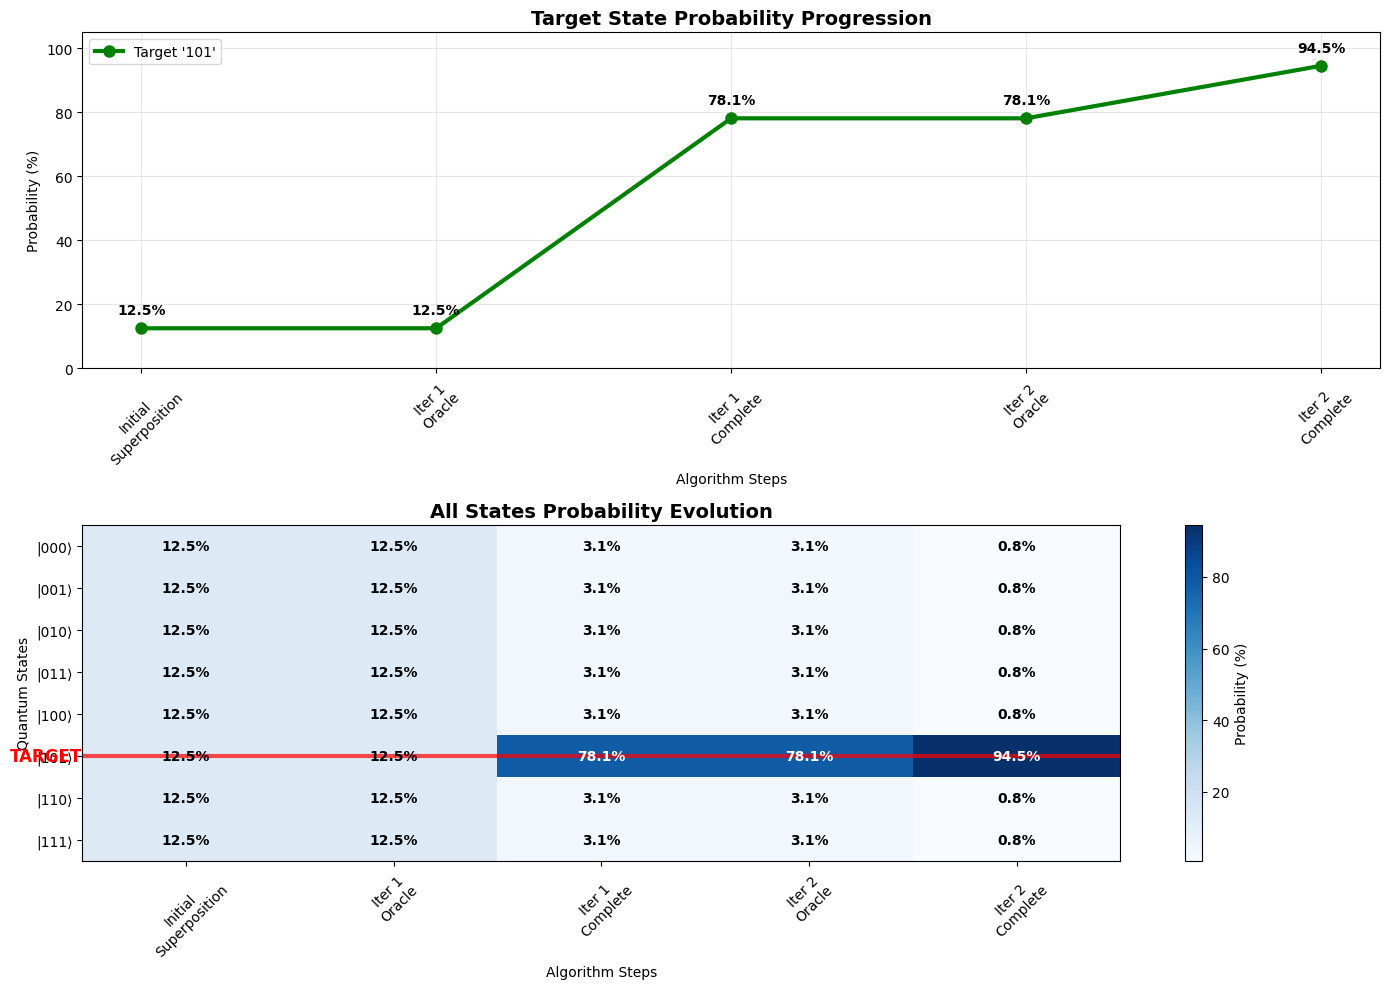


🎊 Final Results:
   Target '101' final probability: 94.5%
   Amplification factor: 7.6x (from 12.5% to 94.5%)


In [5]:
# Now let's see a more dramatic progression with 3 qubits  
print("\n" + "="*80)
print("🔍 3-Qubit Example (More iterations to see progression):")
progression_3q = visualize_grover_progression("101", show_detailed_steps=True)

### 🧠 Understanding the Progression Patterns in Grover's Algorithm

What to observe in the visualizations:

### 🔹 Initial State: Equal Superposition
- All quantum states begin with equal probability:
  - 2-qubit system → 4 states → 25% each
  - 3-qubit system → 8 states → 12.5% each
- This sets up a balanced canvas for interference to act upon.

### 🔹 After Oracle: Phase Flip (Invisible but Critical)
- The oracle **flips the phase** (i.e. sign) of the target state(s), not the probability.
- This operation is essential for enabling interference but is not directly visible in measurement.
- Think of it as a "secret tag" that only the quantum algorithm can detect.

### 🔹 After Diffusion: Amplification through Interference
- The **diffusion operator** reflects amplitudes around the mean:
  - The **target state's amplitude increases**, raising its measurement probability.
  - **Non-target states decrease** due to destructive interference.
- This is where the quantum magic becomes visible.

### 🎯 Optimal Stopping — Why Grover Doesn’t Always Reach 100%
- Grover’s algorithm typically does **not** reach exactly 100% success probability.
- It maximizes success at the **optimal number of iterations**:
  \[
  k_{\text{opt}} \approx \left\lfloor \frac{\pi}{4} \sqrt{N/M} \right\rfloor
  \]
- Examples:
  - **2-qubit system (N = 4):** 1 iteration → **100%** success
  - **3-qubit system (N = 8):** 2 iterations → ~**94.5%** success
- Continuing **beyond** the optimal point causes oscillations and decreases accuracy.

#### 💡 Key Insights:
- Grover’s algorithm doesn’t "guess" — it **rotates the quantum state** toward the solution.
- It uses a combination of **phase flips** and **reflections** to create **constructive interference**.
- The result: a **quadratically faster** search (O(√N) vs O(N) classically).

> 🧪 This visualization shows why Grover's algorithm is powerful: it amplifies the right answer, not by chance — but by design.

### 🚀 Running Grover's Algorithm on a Simulator

Now that we’ve built the complete Grover circuit, let’s execute it on a local simulator and observe the results.

- We’ll use Qiskit’s `AerSimulator` to run the circuit with 1000 shots.
- The results will show how often each quantum state is measured.
- If Grover's algorithm works correctly, we should see a **high probability** for the target state — in this case, `"110"`.

The target state's frequency tells us how effective Grover's amplification process was in guiding the measurement toward the correct result.

In [6]:
# Create Grover circuit for target "110"
target_states = ["110"]
grover_circuit, iterations = create_grover_circuit(target_states)

# Run Grover's algorithm
print("🚀 Running Grover's Algorithm...")
print("=" * 50)

# Transpile the circuit for the simulator
transpiled_circuit = transpile(grover_circuit, simulator)

# Execute the circuit
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print("📊 Results:")
for state, count in sorted(counts.items()):
    probability = count / 1000 * 100
    marker = "🎯" if state in target_states else "  "
    print(f"{marker} State '{state}': {count:3d} times ({probability:5.1f}%)")

# Calculate success rate
success_count = sum(counts.get(state, 0) for state in target_states)
success_rate = success_count / 1000 * 100
print(f"\n🎊 Success Rate: {success_rate:.1f}%")

if success_rate > 90:
    print("🎉 Excellent! Grover's algorithm achieved near-perfect results!")
elif success_rate > 50:
    print("✅ Good results - quantum speedup achieved!")
else:
    print("⚠️ Lower success rate - this might indicate an issue with the circuit")

🎯 Searching for: ['110']
📊 Total states: 8, Marked states: 1
🔄 Optimal iterations: 2
🚀 Running Grover's Algorithm...
📊 Results:
   State '000':  11 times (  1.1%)
   State '001':   5 times (  0.5%)
   State '010':   8 times (  0.8%)
   State '011':  12 times (  1.2%)
   State '100':   4 times (  0.4%)
   State '101':   8 times (  0.8%)
🎯 State '110': 943 times ( 94.3%)
   State '111':   9 times (  0.9%)

🎊 Success Rate: 94.3%
🎉 Excellent! Grover's algorithm achieved near-perfect results!


### 📊 Interpreting the Final Results

After running Grover’s algorithm, we now visualize how frequently each state was measured.

- The **bar chart** shows how strongly the algorithm favored the target.
- The **pie chart** gives a probability breakdown across all measured states.
- If everything worked well, the **target state will dominate** the results.

We'll also print a **textual visualization** in case plotting fails (or you're using a terminal-based environment).


📊 Creating visualization...

📊 Results Visualization:
   |000⟩:                                                      11 (  1.1%)
   |001⟩:                                                       5 (  0.5%)
   |010⟩:                                                       8 (  0.8%)
   |011⟩:                                                      12 (  1.2%)
   |100⟩:                                                       4 (  0.4%)
   |101⟩:                                                       8 (  0.8%)
🎯 |110⟩: ██████████████████████████████████████████████████  943 ( 94.3%)
   |111⟩:                                                       9 (  0.9%)
🎯 Target Success Rate: 94.3% (943/1000)

📈 Attempting graphical visualization...


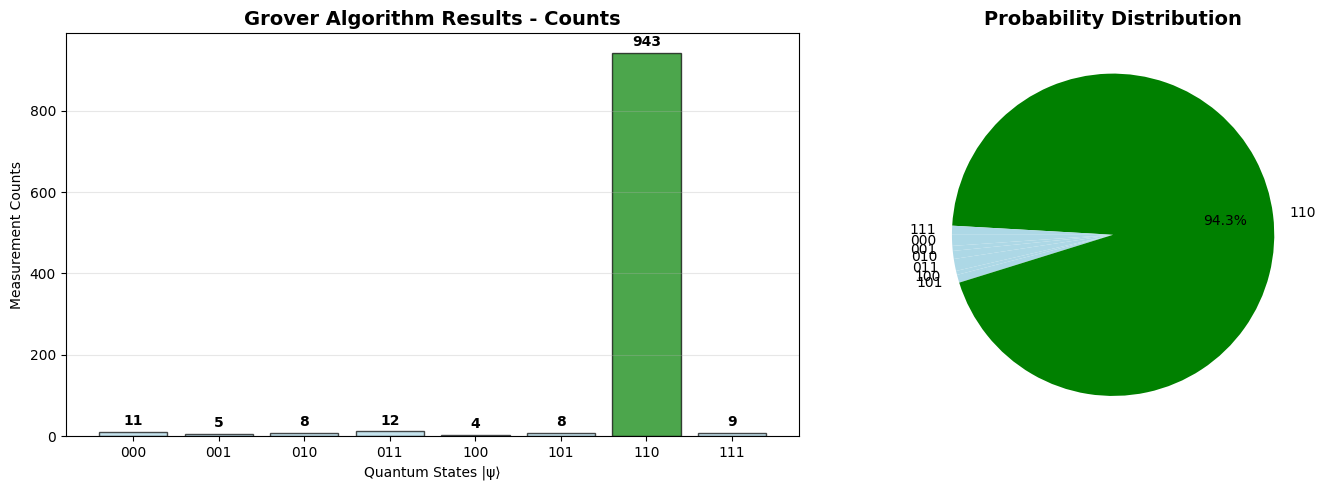

✅ Matplotlib visualization displayed!
✅ Qiskit plot_distribution displayed!

💡 At minimum, you have the detailed text visualization above!


In [7]:
# Enhanced visualization with better fallback methods
print("📊 Creating visualization...")

def create_visualization(counts, target_states):
    """Grover visualization where only the largest segment gets a percentage in the pie chart."""
    import matplotlib.pyplot as plt

    print("\n📊 Results Visualization:")
    print("=" * 60)

    if not counts:
        print("⚠️ No data in counts. Cannot visualize.")
        return

    num_qubits = len(next(iter(counts)))
    states = [format(i, f'0{num_qubits}b') for i in range(2 ** num_qubits)]
    max_count = max(counts.values())
    total_shots = sum(counts.values())

    for state in states:
        count = counts.get(state, 0)
        percentage = (count / total_shots) * 100 if total_shots else 0
        bar_length = int(50 * count / max_count) if max_count else 0
        bar = '█' * bar_length
        marker = '🎯' if state in target_states else '  '
        print(f"{marker} |{state}⟩: {bar:<50} {count:4d} ({percentage:5.1f}%)")

    print("=" * 60)
    success_count = sum(counts.get(state, 0) for state in target_states)
    success_rate = (success_count / total_shots) * 100 if total_shots else 0
    print(f"🎯 Target Success Rate: {success_rate:.1f}% ({success_count}/{total_shots})")

    print(f"\n📈 Attempting graphical visualization...")

    try:
        values = [counts.get(state, 0) for state in states]
        colors = ['green' if state in target_states else 'lightblue' for state in states]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Bar chart
        bars = ax1.bar(states, values, color=colors, alpha=0.7, edgecolor='black')
        ax1.set_title('Grover Algorithm Results - Counts', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Quantum States |ψ⟩')
        ax1.set_ylabel('Measurement Counts')
        ax1.grid(True, alpha=0.3, axis='y')

        for bar, value in zip(bars, values):
            if value > 0:
                ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max_count * 0.01,
                         str(value), ha='center', va='bottom', fontweight='bold')

        # Pie chart: only show percentage on biggest slice
        non_zero = [(state, count) for state, count in zip(states, values) if count > 0]
        if non_zero:
            labels, sizes = zip(*non_zero)
            pie_colors = ['green' if state in target_states else 'lightblue' for state in labels]
            max_index = sizes.index(max(sizes))

            def format_pct(pct, idx=None):
                return f'{pct:.1f}%' if idx == max_index else ''

            # Wrap format_pct to access index
            def make_autopct(sizes):
                def pct_formatter(pct):
                    idx = int(round(pct / 100.0 * sum(sizes)))
                    try:
                        slice_index = sizes.index(max(sizes)) if idx > 50 else -1
                        return f'{pct:.1f}%' if sizes[slice_index] == max(sizes) else ''
                    except:
                        return ''
                return pct_formatter

            ax2.pie(
                sizes,
                labels=labels,
                colors=pie_colors,
                autopct=make_autopct(sizes),
                startangle=180,
                labeldistance=1.1,
                pctdistance=0.7
            )
            ax2.set_title('Probability Distribution', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()
        print("✅ Matplotlib visualization displayed!")

    except Exception as e:
        print(f"⚠️ Matplotlib visualization failed: {e}")

    try:
        from qiskit.visualization import plot_distribution
        fig = plot_distribution(counts, title='Grover Algorithm Results')
        plt.show()
        print("✅ Qiskit plot_distribution displayed!")
    except Exception as e:
        print(f"⚠️ Qiskit plot_distribution failed: {e}")

    print(f"\n💡 At minimum, you have the detailed text visualization above!")


# Create the visualization
create_visualization(counts, target_states)

## 🚀 6. Bringing It All Together – Complete Grover Algorithm

### What Are We About to Build? 🏗️

We're going to manually construct a **simple version of Grover’s algorithm** to find the state `|11⟩` in a 2-qubit system. This hands-on approach reveals exactly how each step works—no black boxes, just quantum mechanics in action.

### Why the Manual Approach? 🔍

Instead of using high-level library functions, we’ll build each piece ourselves so you can understand:

- ✅ **What quantum gates** are applied  
- ✅ **Why each step** exists  
- ✅ **How the quantum state** evolves during the algorithm  

This clarity is especially helpful when you're learning how Grover’s algorithm actually finds the answer.

### Step-by-Step Breakdown 🔄

#### 1️⃣ Initialization: Create Superposition

- **Goal**: Explore all possible answers equally  
- **How**: Apply Hadamard (`H`) gates to each qubit  
- **Result**: The quantum system enters an equal superposition of all 4 states: `|00⟩`, `|01⟩`, `|10⟩`, `|11⟩`  
- **Analogy**: Like saying, “The answer could be any of these with equal chance”

#### 2️⃣ Oracle: Secretly Mark the Answer

- **Goal**: Mark the correct state (`|11⟩`) by flipping its phase  
- **How**: Apply a controlled-Z (`CZ`) gate to flip the phase of `|11⟩` only  
- **What It Does**: Adds a negative sign to `|11⟩`’s amplitude, leaving others unchanged  
- **Analogy**: Tag the right book with an invisible bookmark—only the algorithm can detect it

#### 3️⃣ Diffusion Operator: Amplify the Right Answer

- **Goal**: Increase the probability of measuring `|11⟩`  
- **How**: Perform an inversion about the average using:  
    1. `H` gates to return to basis  
    2. `X` gates to flip the states  
    3. A `CZ` gate to reflect about the mean  
    4. `X` gates to undo the flips  
    5. `H` gates to re-enter superposition  
- **Result**: The marked state’s amplitude is amplified  
- **Analogy**: Like echoing a signal that reinforces the correct frequency and cancels noise

#### 4️⃣ Measurement: Observe the Result

- **Goal**: Collapse the quantum state into one classical outcome  
- **Expectation**: You should observe `|11⟩` with very high probability (close to 100%)

### ✨ The Key Insight

Grover’s algorithm doesn’t guess—it **amplifies the right answer using quantum interference**:

- ❌ Wrong answers destructively interfere (cancel out)  
- ✅ The right answer constructively interferes (gets louder)

Think of it like tuning a radio: the noise fades and the correct station comes in clear and strong.

### Now Let's Build It… Step by Step 🧪

🛠️ Building Simple Grover Circuit for target '110'
✅ Simple circuit created!

📐 Circuit diagram:
     ┌───┐┌───┐     ┌───┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤└───┘  │  ├───┤├───┤└───┘       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 

🚀 Running simple circuit...

📊 Simple Results:
Measurement counts: {'110': 23, '111': 38, '100': 26, '011': 755, '001': 42, '000': 41, '010': 37, '101': 38}

🎯 Success Analysis:
   - Looking for: '110'
   - Found '110': 23 times out of 1000
   - Success rate: 2.3%

📊 Crea

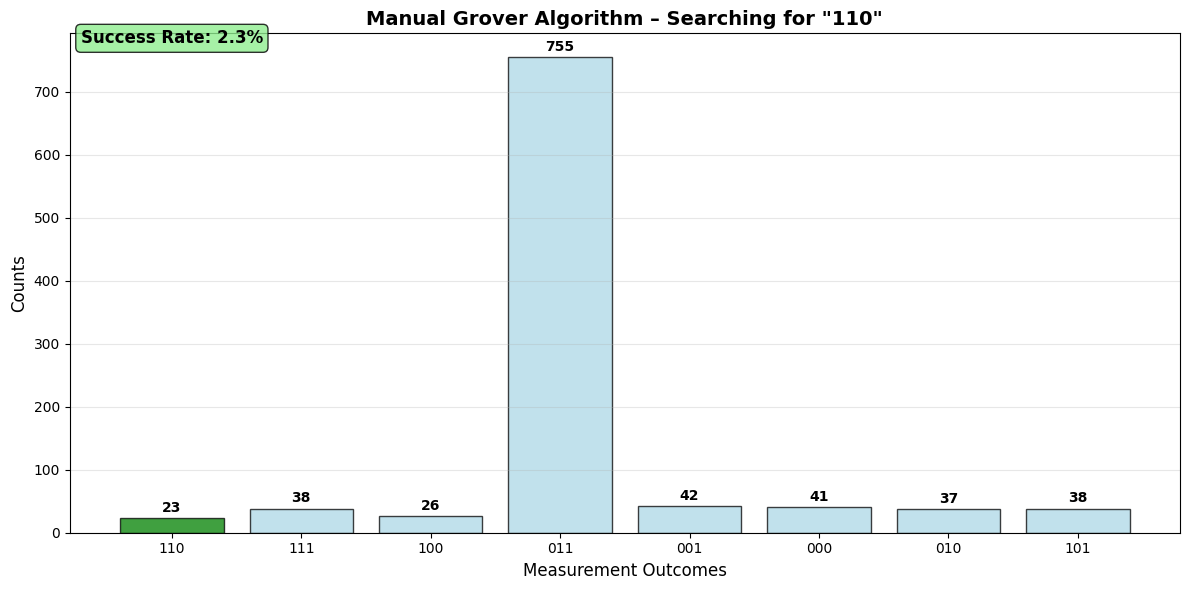

✅ Manual bar chart created!


In [8]:
# Let's create a simple, manual Grover circuit for 3 qubits searching for "110"
print("🛠️ Building Simple Grover Circuit for target '110'")

# Create a 3-qubit circuit
simple_qc = QuantumCircuit(3, 3)

# Step 1: Initialize in superposition
simple_qc.h([0, 1, 2])

# Step 2: Oracle for state "110" (qubit order is little-endian: Q2 Q1 Q0 → bitstring[::-1] = "011")
# Apply X to qubits where target bit is 0 (qubit 0 only, since target = "110" → reversed = "011")
simple_qc.x(0)

# Multi-controlled Z (phase flip) with control qubits [0, 1] → target qubit 2
# Qiskit convention: apply H → CCX → H to simulate CCZ
simple_qc.h(2)
simple_qc.ccx(0, 1, 2)
simple_qc.h(2)

# Undo the X gate on qubit 0
simple_qc.x(0)

# Step 3: Diffusion operator (inversion about mean)
# H → X → CCZ → X → H
simple_qc.h([0, 1, 2])
simple_qc.x([0, 1, 2])

# Reflect about |000⟩ state: use same trick (H + CCX + H)
simple_qc.h(2)
simple_qc.ccx(0, 1, 2)
simple_qc.h(2)

simple_qc.x([0, 1, 2])
simple_qc.h([0, 1, 2])

# Step 4: Measurement
simple_qc.measure([0, 1, 2], [0, 1, 2])

print("✅ Simple circuit created!")

# Draw the circuit
print("\n📐 Circuit diagram:")
print(simple_qc.draw())

# Run this simple version
print("\n🚀 Running simple circuit...")
simple_transpiled = transpile(simple_qc, simulator)
simple_job = simulator.run(simple_transpiled, shots=1000)
simple_result = simple_job.result()
simple_counts = simple_result.get_counts()

# Reverse keys to match bit order (Qiskit returns little-endian)
reversed_counts = {k[::-1]: v for k, v in simple_counts.items()}

print(f"\n📊 Simple Results:")
print(f"Measurement counts: {reversed_counts}")

# Success for "110"
target = "110"
success = reversed_counts.get(target, 0)
total = sum(reversed_counts.values())
success_rate = success / total

print(f"\n🎯 Success Analysis:")
print(f"   - Looking for: '{target}'")
print(f"   - Found '{target}': {success} times out of {total}")
print(f"   - Success rate: {success_rate:.1%}")

# Visualization
print(f"\n📊 Creating Visualization...")

try:
    plot_distribution(reversed_counts, title=f"Manual Grover – Target '{target}'")
    plt.show()
    print("✅ plot_distribution worked!")
except Exception as e:
    print(f"❌ plot_distribution failed: {e}")

# Fallback: Matplotlib
plt.figure(figsize=(12, 6))
states = list(reversed_counts.keys())
values = list(reversed_counts.values())
colors = ['green' if state == target else 'lightblue' for state in states]
bars = plt.bar(states, values, color=colors, edgecolor='black', alpha=0.75)

for bar, count in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             str(count), ha='center', fontweight='bold')

plt.xlabel('Measurement Outcomes', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title(f'Manual Grover Algorithm – Searching for "{target}"', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.text(0.01, 0.98, f'Success Rate: {success_rate:.1%}', 
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Manual bar chart created!")

## 🚀 7. Running it on a real Quantum Computer

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session
from qiskit.visualization import plot_distribution
from collections import Counter
import matplotlib.pyplot as plt

def run_simple_grover_ibm_2qubit(target="11", shots=1024, instance="your/hub/group/project"):
    """
    Run 2-qubit Grover's algorithm for a target like '11' using IBM Qiskit Runtime Sampler.

    Parameters:
        target (str): 2-bit string target to search for (e.g., "11")
        shots (int): Number of shots for execution
        instance (str): IBM Quantum instance string
    """
    result = ''
    print(f"🛠️ Building Grover Circuit for target '{target}'")

    # Step 1: Build Grover Circuit manually
    qc = QuantumCircuit(2)
    qc.h([0, 1])

    # Oracle for '11'
    rev_target = target[::-1]
    for i, bit in enumerate(rev_target):
        if bit == "0":
            qc.x(i)
    qc.cz(0, 1)
    for i, bit in enumerate(rev_target):
        if bit == "0":
            qc.x(i)

    # Diffusion
    qc.h([0, 1])
    qc.x([0, 1])
    qc.cz(0, 1)
    qc.x([0, 1])
    qc.h([0, 1])
    qc.measure_all()

    # Step 2: Connect and run on IBM Quantum
    print("🔌 Connecting to IBM Quantum service...")
    service = QiskitRuntimeService(instance=instance)
    backend = service.least_busy(operational=True, simulator=False, min_num_qubits=2)

    print(f"✅ Connected to: {backend.name}")

    with Session(backend=backend) as session:
        print("🚀 Submitting Sampler job via Qiskit Runtime...")
        qc = transpile(qc, backend=backend, optimization_level=1)
        sampler = Sampler()
        job = sampler.run([qc], shots=shots)
        result = job.result()
    return result

def processResult(result):
    # Step 3: Extract and process results from BitArray
    bit_array = result[0].data.meas
    bitstrings = [b[::-1] for b in bit_array.to_labels()]
    counts = dict(Counter(bitstrings))

    total = sum(counts.values())
    success = counts.get(target, 0)
    success_rate = success / total * 100

    print("\n📊 Results (bit order corrected):")
    for state, count in sorted(counts.items()):
        marker = "🎯" if state == target else "  "
        print(f"{marker} {state}: {count} ({count / total:.1%})")

    print(f"\n🎯 Success Rate for target '{target}': {success_rate:.1f}%")

    # Optional: plot
    plot_distribution(counts, title=f"Grover on IBM – Target '{target}'")
    plt.show()

In [11]:
import time

try:
    start = time.time()
    result = run_simple_grover_ibm_2qubit(target="11", instance="diorama")
    processResult(result)
    end = time.time()
    print(f"⏱️ Total runtime: {end - start:.2f} seconds")
except Exception as e:
    print(f"❌ An error occurred: {e}")

🛠️ Building Grover Circuit for target '11'
🔌 Connecting to IBM Quantum service...
✅ Connected to: ibm_aachen
❌ An error occurred: '409 Client Error: Conflict for url: https://eu-de.quantum.cloud.ibm.com/api/v1/sessions. {"errors":[{"code":1218,"message":"Instance time limit exceeded crn:v1:bluemix:public:quantum-computing:eu-de:a/2527e101797949b0917ad052341da6ab:7dc21570-a2de-4217-bfb0-7c6e5ebc54a6::.","solution":"Contact instance administrator to increase limit.","more_info":"https://cloud.ibm.com/apidocs/quantum-computing#error-handling"}],"trace":"9d2062b6-6e64-43a7-873a-54846e1aa1cc"}\n'
